In [19]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации
from sklearn import preprocessing

#Воспользуемся встроенным датасетом, который содержит информацию об опухолях груди:

from sklearn.datasets import load_iris # подгружаем датасет
iriski = load_iris()

#Теперь зададим зависимую и независимые переменные:

Y = iriski.target ## Наша целевая переменная, 0 — если рака нет, 1 — если есть 
X = iriski.data # X - признаки, по которым мы будем предсказывать рак 

#Разбиваем выборку на обучающую и тестовую и обучаем нашу модель:

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=50)

In [20]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/home/pavlk/APPS/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
#Готово! Теперь осталось только вычислить необходимые метрики:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = model.predict(X_val)
print(accuracy_score(Y_val,Y_predicted))

0.9777777777777777


# 3B.3 Классификация

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [169]:
data = pd.read_csv('train_mobile.csv', sep=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<AxesSubplot:>

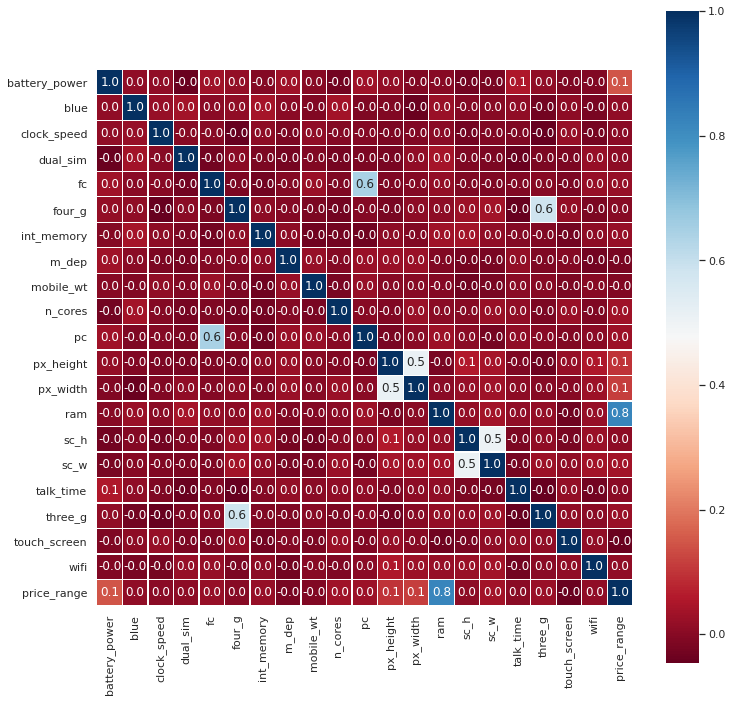

In [170]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [171]:
data.corr()['price_range'].sort_values()

touch_screen    -0.040001
m_dep           -0.018554
mobile_wt       -0.007968
four_g           0.001001
clock_speed      0.003494
talk_time        0.004394
dual_sim         0.009002
sc_h             0.009140
blue             0.014001
wifi             0.014001
int_memory       0.022132
fc               0.022464
three_g          0.024638
pc               0.027628
n_cores          0.031260
sc_w             0.035359
px_height        0.097951
px_width         0.116703
battery_power    0.149402
ram              0.822354
price_range      1.000000
Name: price_range, dtype: float64

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(data[['ram', 'battery_power', 'px_height', 'px_width', 'touch_screen']], data.iloc[:, -1], test_size=0.2, random_state=31)

In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [194]:
new = model.predict(X_test)

In [204]:
old = np.array(y_test)
#old = old[:, np.newaxis]

In [205]:
#new = new[:, np.newaxis]

In [206]:
old.shape, new.shape

((400,), (400,))

In [207]:
res = np.array([old, new])

In [209]:
res[1].sum(), res[0].shape

(213, (400,))

In [210]:
res[0][(res[1] == res[0]) & (res[1] == 1) & (res[0] == 1)].sum()

210

In [211]:
true = np.array([res[0][res[1] == res[0]], res[1][res[1] == res[0]]])
true[1][true[1] == 1].sum()

210

In [212]:
210/213

0.9859154929577465

# 3B.5. Логистическая регрессия. Часть 2

In [214]:
def g(pred, true):
    return -true*np.log(pred) - (1-true)*np.log(1-pred)
a = g(0.2,0)
b = g(0.8,0)
c = 0
d = g(0.6,1)
a + b + c + d

2.3434070875143007

In [282]:

i1 = np.array([0.2, 0.3, 0.5])
j1 = np.array([0, 0, 1])

i2 = np.array([0, 0, 1])
j2 = np.array([0, 0, 1])

i3 = np.array([0.1, 0, 0.9])
j3 = np.array([1, 0, 0])

total1 = np.log(0.5)

total2 = 0

total3 = np.log(0.1)

sum([total1, total2, total3])/-3

0.9985774245179969

# 3B.6. Логистическая регрессия. Практика